## Descripción de las columnas

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bouts_out_new.csv")

## Descripción de los datos

In [3]:
df.shape

(387427, 26)

In [4]:
df.head()

,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,...,kos_A,kos_B,result,decision,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
0,35.0,27.0,179.0,175.0,178.0,179.0,orthodox,orthodox,160.0,160.0,...,33,34.0,draw,SD,110.0,118.0,115.0,113.0,114.0,114.0
1,26.0,31.0,175.0,185.0,179.0,185.0,orthodox,orthodox,164.0,164.0,...,34,32.0,win_A,UD,120.0,108.0,120.0,108.0,120.0,108.0
2,28.0,26.0,176.0,175.0,NaN,179.0,orthodox,orthodox,154.0,154.0,...,13,33.0,win_B,KO,NaN,NaN,NaN,NaN,NaN,NaN
3,25.0,29.0,175.0,174.0,179.0,180.0,orthodox,orthodox,155.0,155.0,...,32,19.0,win_A,KO,47.0,48.0,49.0,46.0,48.0,47.0
4,25.0,35.0,175.0,170.0,179.0,170.0,orthodox,orthodox,155.0,NaN,...,32,33.0,win_A,UD,118.0,110.0,119.0,109.0,117.0,111.0


In [5]:
df.columns

Index(['age_A', 'age_B', 'height_A', 'height_B', 'reach_A', 'reach_B',
       'stance_A', 'stance_B', 'weight_A', 'weight_B', 'won_A', 'won_B',
       'lost_A', 'lost_B', 'drawn_A', 'drawn_B', 'kos_A', 'kos_B', 'result',
       'decision', 'judge1_A', 'judge1_B', 'judge2_A', 'judge2_B', 'judge3_A',
       'judge3_B'],
      dtype='object')

In [6]:
rename_columns = {
    'age_A': 'edad_a', 'age_B': 'edad_b', 'height_A': 'altura_a', 
    'height_B': 'altura_b', 'reach_A': 'alcance_mano_a',
    'reach_B': 'alcance_mano_b', 'stance_A': 'posicion_a', 'stance_B': 'posicion_b',
    'weight_A': 'peso_a', 'weight_B': 'peso_b', 'won_A': 'ganadas_a', 'won_B': 'ganadas_b',
       'lost_A': 'perdidas_a', 'lost_B': 'perdidas_a', 'drawn_A': 'empatadas_a', 'drawn_B':'empatadas_b',
    'kos_A': 'kos_a', 'kos_B': 'kos_b', 'result': 'resultado', 'decision': 'decision',
    'judge1_A': 'juez1_a', 'judge1_B': 'juez1_b', 'judge2_A': 'juez2_a', 'judge2_B': 'juez2_b', 
    'judge3_A': 'juez3_a', 'judge3_B': 'juez3_b'
}
df.rename(columns=rename_columns, inplace=True)

In [31]:
df.describe()

,edad_a,edad_b,altura_a,altura_b,alcance_mano_a,alcance_mano_b,peso_a,peso_b,ganadas_a,ganadas_b,...,empatadas_a,empatadas_b,kos_a,kos_b,juez1_a,juez1_b,juez2_a,juez2_b,juez3_a,juez3_b
count,352888.000000,257935.000000,249246.000000,134640.000000,112342.000000,37873.000000,135573.000000,130358.000000,387427.000000,387427.000000,...,387427.000000,387427.000000,387427.000000,387348.000000,52248.000000,52060.000000,70371.000000,70032.000000,61231.000000,61023.000000
mean,24.416041,26.583345,172.786657,172.882657,178.848605,179.001030,146.340636,147.089484,23.108438,15.159080,...,2.826481,2.636375,10.338887,6.234735,62.778901,59.509700,59.560941,56.570411,60.784276,57.995215
std,6.523590,11.823224,9.130127,9.430631,12.002404,14.867537,30.240142,30.624890,27.629901,19.938137,...,5.584610,5.027003,12.392049,8.750690,30.337580,29.285058,31.021367,30.260935,31.910461,31.170590
min,-74.000000,-74.000000,2.000000,15.000000,5.000000,1.000000,10.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,23.000000,166.000000,167.000000,170.000000,171.000000,125.000000,126.000000,5.000000,2.000000,...,0.000000,0.000000,2.000000,0.000000,39.000000,37.000000,39.000000,36.000000,39.000000,36.000000
50%,24.000000,26.000000,173.000000,173.000000,178.000000,178.000000,140.000000,140.000000,14.000000,8.000000,...,1.000000,1.000000,6.000000,3.000000,59.000000,54.000000,58.000000,54.000000,58.000000,54.000000
75%,27.000000,30.000000,178.000000,179.000000,185.000000,185.000000,160.000000,160.000000,31.000000,21.000000,...,3.000000,3.000000,14.000000,9.000000,80.000000,79.000000,80.000000,75.000000,80.000000,78.000000
max,1818.000000,2016.000000,255.000000,255.000000,456.000000,456.000000,363.000000,450.000000,332.000000,251.000000,...,77.000000,76.000000,131.000000,128.000000,540.000000,291.000000,299.000000,294.000000,300.000000,295.000000


In [32]:
df.isnull().sum()

edad_a             34539
edad_b            129492
altura_a          138181
altura_b          252787
alcance_mano_a    275085
alcance_mano_b    349554
posicion_a        156418
posicion_b        156418
peso_a            251854
peso_b            257069
ganadas_a              0
ganadas_b              0
perdidas_a             0
perdidas_a             0
empatadas_a            0
empatadas_b            0
kos_a                  0
kos_b                 79
resultado              0
decision               0
juez1_a           335179
juez1_b           335367
juez2_a           317056
juez2_b           317395
juez3_a           326196
juez3_b           326404
dtype: int64

## Que tiene la columna a clasificar?

In [33]:
df.head().resultado

0     draw
1    win_A
2    win_B
3    win_A
4    win_A
Name: resultado, dtype: object

## Distribución de los datos

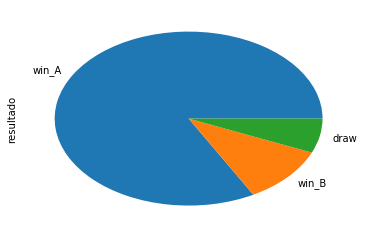

In [34]:
df.resultado.value_counts().plot.pie()

In [35]:
df['diff_edad_a_b'] = df.edad_a - df.edad_b

In [36]:
df.head()

,edad_a,edad_b,altura_a,altura_b,alcance_mano_a,alcance_mano_b,posicion_a,posicion_b,peso_a,peso_b,...,kos_b,resultado,decision,juez1_a,juez1_b,juez2_a,juez2_b,juez3_a,juez3_b,diff_edad_a_b
0,35.0,27.0,179.0,175.0,178.0,179.0,orthodox,orthodox,160.0,160.0,...,34.0,draw,SD,110.0,118.0,115.0,113.0,114.0,114.0,8.0
1,26.0,31.0,175.0,185.0,179.0,185.0,orthodox,orthodox,164.0,164.0,...,32.0,win_A,UD,120.0,108.0,120.0,108.0,120.0,108.0,-5.0
2,28.0,26.0,176.0,175.0,NaN,179.0,orthodox,orthodox,154.0,154.0,...,33.0,win_B,KO,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,25.0,29.0,175.0,174.0,179.0,180.0,orthodox,orthodox,155.0,155.0,...,19.0,win_A,KO,47.0,48.0,49.0,46.0,48.0,47.0,-4.0
4,25.0,35.0,175.0,170.0,179.0,170.0,orthodox,orthodox,155.0,NaN,...,33.0,win_A,UD,118.0,110.0,119.0,109.0,117.0,111.0,-10.0


In [37]:
df["gano_a"] = df.resultado == 'win_A'

In [38]:
df["gano_b"] = df.resultado == "win_B"

In [39]:
df["empataron"] = df.resultado == "draw"

In [40]:
df.empataron.value_counts()

False    362655
True      24772
Name: empataron, dtype: int64

In [41]:
df.gano_a.value_counts()

True     321661
False     65766
Name: gano_a, dtype: int64

In [42]:
df.gano_b.value_counts()

False    346433
True      40994
Name: gano_b, dtype: int64

## Infiere la edad?

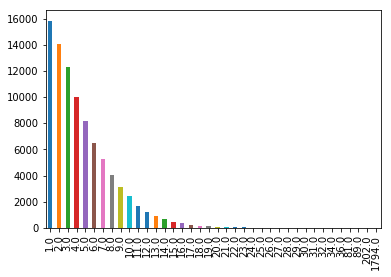

In [43]:
df[df.diff_edad_a_b>0].diff_edad_a_b.value_counts().sort_index().plot.bar()


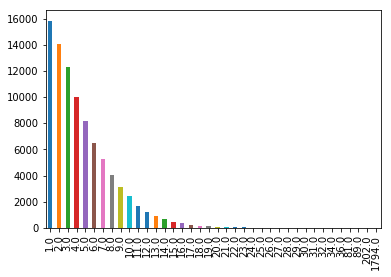

In [44]:
df[df.diff_edad_a_b>0].diff_edad_a_b.value_counts().sort_index().plot.bar()

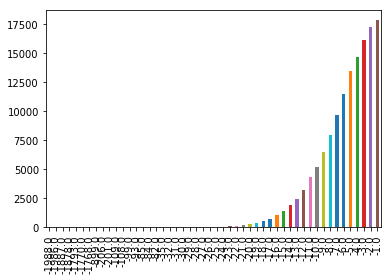

In [45]:
df[df.diff_edad_a_b<0].diff_edad_a_b.value_counts().sort_index().plot.bar()


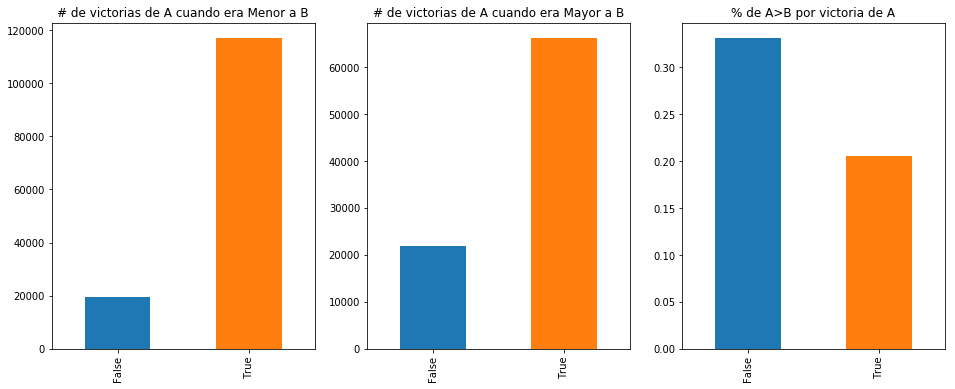

In [46]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title("# de victorias de A cuando era Menor a B")
df[df.diff_edad_a_b<0].gano_a.value_counts().sort_index().plot.bar(ax=ax[0])
ax[1].set_title('# de victorias de A cuando era Mayor a B')
df[df.diff_edad_a_b>0].gano_a.value_counts().sort_index().plot.bar(ax=ax[1])
ax[2].set_title('% de A>B por victoria de A')
(df[df.diff_edad_a_b > 0].gano_a.value_counts().sort_index() / df.gano_a.value_counts().sort_index()).plot.bar(ax=ax[2])

 En el primer gráfico podemos observar que hay mayor cantidad de victorias de A cuando es menor que B
 En el segundo gráfico podemos denotar que hay más victorias de A cuando era mayor a B, lo cuál podría llegar a contradecir la afirmación anterior. Para eso, haremos un gráfico porcentual.
 En el tercer gráfico podemos ver que el porcentaje de una victoria de A cuando A>B en edad es menor que si B>A.

## ¿Qué relación tendrá la altura con respecto al resultado?

In [47]:
df["diff_altura_a_b"] = df.altura_a - df.altura_b

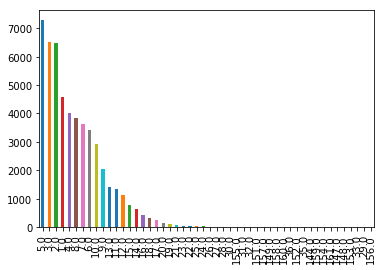

In [49]:
df[df.diff_altura_a_b>0].diff_altura_a_b.value_counts().plot.bar()

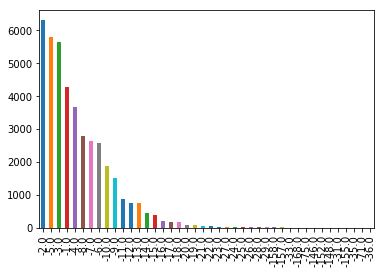

In [50]:
df[df.diff_altura_a_b<0].diff_altura_a_b.value_counts().plot.bar()

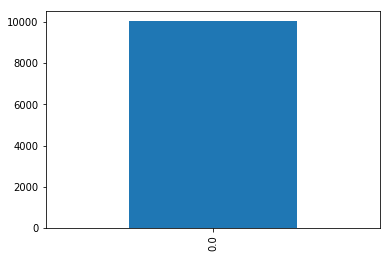

In [52]:
df[df.diff_altura_a_b==0].diff_altura_a_b.value_counts().plot.bar()

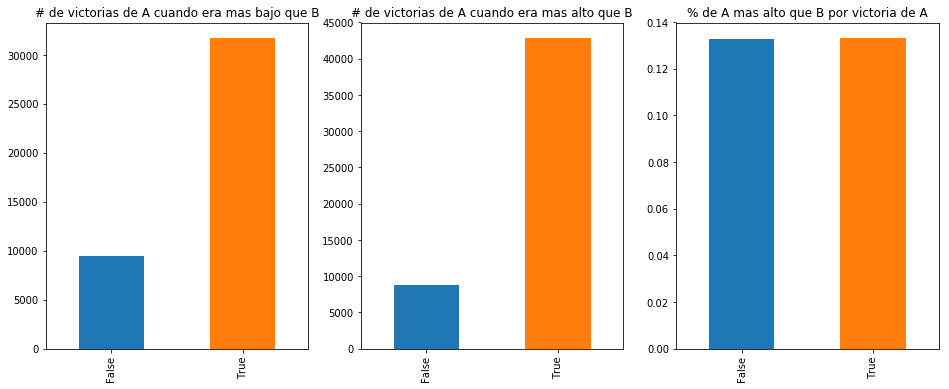

In [53]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title("# de victorias de A cuando era mas bajo que B")
df[df.diff_altura_a_b<0].gano_a.value_counts().sort_index().plot.bar(ax=ax[0])
ax[1].set_title('# de victorias de A cuando era mas alto que B')
df[df.diff_altura_a_b>0].gano_a.value_counts().sort_index().plot.bar(ax=ax[1])
ax[2].set_title('% de A mas alto que B por victoria de A')
(df[df.diff_altura_a_b > 0].gano_a.value_counts().sort_index() / df.gano_a.value_counts().sort_index()).plot.bar(ax=ax[2])

Aquí podemos denotar claramente que la altura no va a inferir en el resultado

## Y el alcance de la mano?

In [54]:
df["diff_alcance_mano_a_b"] = df.alcance_mano_a - df.alcance_mano_b

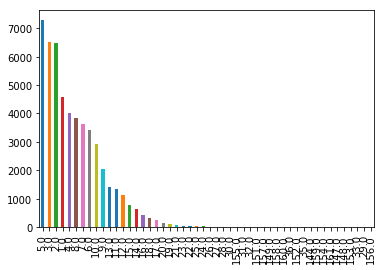

In [56]:
df[df.diff_altura_a_b>0].diff_altura_a_b.value_counts().plot.bar()

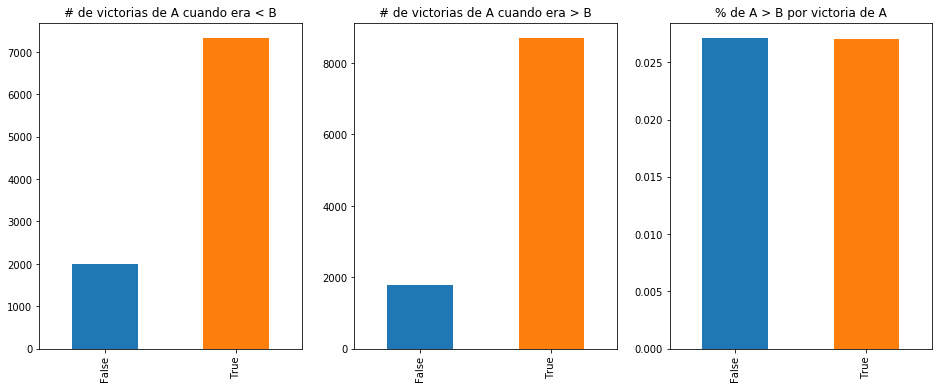

In [57]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title("# de victorias de A cuando era < B")
df[df.diff_alcance_mano_a_b<0].gano_a.value_counts().sort_index().plot.bar(ax=ax[0])
ax[1].set_title('# de victorias de A cuando era > B')
df[df.diff_alcance_mano_a_b>0].gano_a.value_counts().sort_index().plot.bar(ax=ax[1])
ax[2].set_title('% de A > B por victoria de A')
(df[df.diff_alcance_mano_a_b > 0].gano_a.value_counts().sort_index() / df.gano_a.value_counts().sort_index()).plot.bar(ax=ax[2])

In [63]:
df[df.diff_alcance_mano_a_b<0].gano_a.value_counts() / df.gano_a.value_counts()

True     0.022772
False    0.030304
Name: gano_a, dtype: float64

In [7]:
df["gano"] = df.resultado == 'win_A'

In [12]:
df[df.resultado == 'draw'].resultado.value_counts()

draw    24772
Name: resultado, dtype: int64